# Unimportant settings

In [1]:
# This setting allows the notebook to show all 
# outputs instead of only the last one. It's just a QoL thing.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Import packages

This is where we will import our **Python tools** that will help us tackle this problem

In [2]:
import pandas as pd # to read and analyse data
from sklearn.feature_extraction.text import CountVectorizer # to help us count words in text
import matplotlib.pyplot as plt # to help us plot!
import numpy as np # to help us with some linear algebra stuff
from sklearn.metrics.pairwise import cosine_similarity # to compute cosine between two vectors!

# Import the data

In [3]:
clinical_trials_data = pd.read_csv('../data/sample_collection.csv',index_col=0)
patients_data = pd.read_csv('../data/patients_sample.csv',index_col=0)

# Extracting more meaning out of text (documents, actually!)

Let's count how many times each word appears in a patient description!

In [4]:
some_patient_description = patients_data.iloc[0].description
some_patient_description

'A 58-year-old African-American woman presents to the ER with episodic pressing/burning anterior chest pain that began two days earlier for the first time in her life. The pain started while she was walking, radiates to the back, and is accompanied by nausea, diaphoresis and mild dyspnea, but is not increased on inspiration. The latest episode of pain ended half an hour prior to her arrival. She is known to have hypertension and obesity. She denies smoking, diabetes, hypercholesterolemia, or a family history of heart disease. She currently takes no medications. Physical examination is normal. The EKG shows nonspecific changes.\n        '

In [5]:
vectorizer = CountVectorizer()
term_counts = vectorizer.fit_transform(patients_data.description)

term_counts = pd.DataFrame(data=term_counts.toarray(),
                           columns=vectorizer.get_feature_names(),
                           index=patients_data.index)
term_counts.head(3)

,000,017,10,100,103,104f,105,108,110,110bpm,...,worsened,worsening,worsens,wrists,year,years,yesterday,yo,your,zolpidem
patient_id,,,,,,,,,,,,,,,,,,,,,
20141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
201410,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
201411,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


- **Each column** represents one word from the vocabulary of words that compose all the patients' descriptions.
- **Each row** represents a patient
- **Each cell** represents ___how many times___ has a **specific word** been used in the description of a **specific patient**

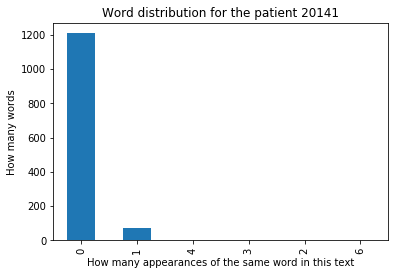

In [6]:
# looking at patient 20141
term_counts.loc[20141].value_counts().plot.bar();
plt.xlabel('How many appearances of the same word in this text');
plt.ylabel('How many words');
plt.title(f'Word distribution for the patient {patients_data.index[0]}');

What we are doing here is representing each document as a **vector**!

<img src="https://memegenerator.net/img/instances/43555096.jpg">

Take the following picture:

<img src="http://3.bp.blogspot.com/_tOOi3R89e74/TUeyueig7ZI/AAAAAAAAAJQ/QHL-VLEWook/s1600/vector_space.png">

This allows us to matheatically compare documents!

<img src="https://2.bp.blogspot.com/-saTZSoc5RAA/WfghS_CMvJI/AAAAAAAAGBg/PcZvT0QNZCcPJq8fAv2v_cSwrnagdm9RgCK4BGAYYCw/s1600/cosine_similarity.PNG">

# Let's apply this!

In [7]:
# first merge all documents and queries together to create the vocabulary

docs = patients_data.description.tolist() + clinical_trials_data.summary.tolist()

vectorizer = CountVectorizer()
term_counts = vectorizer.fit_transform(docs)


term_counts = pd.DataFrame(
                           data=term_counts.toarray(),
                           columns=vectorizer.get_feature_names(),
                           index=patients_data.index.tolist() + clinical_trials_data.index.tolist(),
                          )
term_counts.head(3)
term_counts.shape

,000,0000,0001,0006,001,0014,002,00547248,007,0099,...,ʻlaterʼ,ʻnowʼ,αvβ5,β1,κb,λs,μg,μl,τhe,ﬂow
20141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201410,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201411,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(3221, 17027)

In [8]:
patient_term_counts = term_counts.iloc[0:51,:]
patient_term_counts.head(3)

clinical_trials_term_counts = term_counts.iloc[51:,:]
clinical_trials_term_counts.head(3)

,000,0000,0001,0006,001,0014,002,00547248,007,0099,...,ʻlaterʼ,ʻnowʼ,αvβ5,β1,κb,λs,μg,μl,τhe,ﬂow
20141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201410,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201411,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,000,0000,0001,0006,001,0014,002,00547248,007,0099,...,ʻlaterʼ,ʻnowʼ,αvβ5,β1,κb,λs,μg,μl,τhe,ﬂow
NCT00000408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NCT00000492,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NCT00000501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Now let's start matching!

In [13]:
pairwise_cosine = cosine_similarity(patient_term_counts,clinical_trials_term_counts)

pairwise_cosine = pd.DataFrame(data=pairwise_cosine,
                              columns = clinical_trials_data.index,
                              index=patients_data.index
                              )

pairwise_cosine.head(3)
pairwise_cosine.shape

id,NCT00000408,NCT00000492,NCT00000501,NCT00001853,NCT00004727,NCT00005127,NCT00005485,NCT00005757,NCT00077948,NCT00108381,...,NCT01663402,NCT01766830,NCT01891084,NCT01921842,NCT02164513,NCT02459171,NCT02459327,NCT02498964,NCT02612896,NCT02633319
patient_id,,,,,,,,,,,,,,,,,,,,,
20141,0.446483,0.434488,0.472160,0.455604,0.446577,0.255207,0.474056,0.385708,0.340020,0.140257,...,0.372836,0.488586,0.391392,0.331964,0.378725,0.401752,0.467547,0.445988,0.489418,0.439264
201410,0.296592,0.379519,0.406560,0.331801,0.358902,0.184568,0.396485,0.387298,0.210445,0.000000,...,0.282290,0.440942,0.372678,0.291667,0.348596,0.304866,0.364308,0.393039,0.427447,0.366414
201411,0.340060,0.195748,0.262583,0.296839,0.218611,0.245285,0.276003,0.235907,0.229253,0.029488,...,0.202289,0.252547,0.238352,0.266485,0.228922,0.259202,0.289059,0.218456,0.313370,0.294375


(51, 3170)

- each row is a patient
- each column is a clinical trial
- each cell is the cosine between the two texts!

<img src="https://memegenerator.net/img/instances/66482719.jpg">

> If the angle between a clinical trial vector and a patient vector is very small, what should the cosine be?